### Oppgave 1. (Plotte funksjoner)

#### Importere

In [585]:
import matplotlib.pyplot

#### Variabler

In [586]:
navn = 'f(x)'
D_f = [0, 2]        # Definisjonsmengde
x = []
y = []

#### Funksjon
$x^x-\sqrt{x}$

In [587]:
def f(x):
    return x ** x - x ** 0.5        # Definerer funksjonen

#### Utregning

In [588]:
for i in range(D_f[0] * 100, (D_f[1] * 100) + 1):       # Regner funksjonsverdier for hele definisjonsmengden
    i /= 100        # For å få bruke desimaltall
    x.append(i)
    y.append(f(i))

#### Plotting

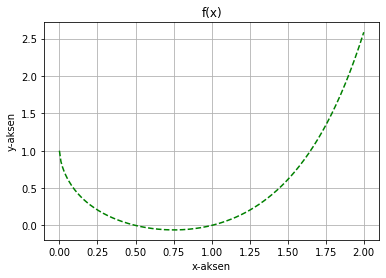

In [589]:
matplotlib.pyplot.plot(x, y, 'g--')
matplotlib.pyplot.grid()
matplotlib.pyplot.title(navn)
matplotlib.pyplot.xlabel('x-aksen')
matplotlib.pyplot.ylabel('y-aksen')
matplotlib.pyplot.show()

#### Åpne fil

In [590]:
f = open('bursdagsang.txt', 'w')

#### Skrive til fil

In [591]:
for i in range(1, 5):
    f.write('Hurra for deg som fyller ditt år,\nJa deg vil vi gratulere.\nAlle i ring omkring deg vi står,\nÅ se nå vil vi marsjere.\n\n')
    
f.close()

### Oppgave 2.(Fillesning) (b)

#### Åpne fil

In [592]:
g = open('temperatur.txt', 'r')

#### Lese fil

In [593]:
dager = []
temperatur = []
innhold = {}

for tegn in g:
    rad = tegn.split()
    innhold[rad[0]] = rad[1]        # Lager en ordbok der man kan kalle på stringen til en dag for å få vite temperaturen
    dager.append(rad[0])        # Egen liste med dager
    temperatur.append(rad[1])       # Egen liste med temperaturer
    
g.close()

### Oppgave 3.(Numeriske Løsninger) (b)

#### Variabler

In [594]:
desimaler = 2       # Antall desimaler
D_f = [-100, 100]       # Definisjonsmengde (konstant igjennom de neste oppgavene)
feilMargin = 10 ** - desimaler
nullpunkter = []

#### Funksjon
$x^2-x-1$

In [595]:
def f(x):
    return x ** 2 - x - 1       # Definerer den nye funksjonen

#### Finne et positivt og negativt tall

In [596]:
def tallfinner(d):
    p = 0
    n = 0

    for x in range(d[0], d[1] + 1):     # For hele definisjonsmengden
        y = f(x)

        if p == 0:      # Sjekker bare når den positive verdien er null, altså at den ikke har blitt gitt en verdi

            if y > 0:       # Sjekker for positive y-verider
                p = x

        if n == 0:      # Bare gir verdien en gang, når den ikke har fått en verdi før

            if y < 0:       # Sjekker for negative y-verdier
                n = x

    return n, p

#### Gjennomsnitt

In [597]:
def gjennomsnitt(a, b):
    return (a + b) / 2      # Gjennomsnittet av to verdier

#### Halveringsmetoden

In [598]:
def halveringsmetoden(a, b, feilMargin):
    c = gjennomsnitt(a, b)

    while abs(f(c)) > feilMargin:       # Kjører bare når nullpunktet ikke er funnet med feilmarginen

        if f(a) * f(c) < 0:
            b = c       # Endrer b verdien til gjennomsnittet av a og b slik at det blir halvparten nærmere nullpunktet

        else:
            a = c       # Gjør det motsatte med a verdien 

        c = gjennomsnitt(a, b)

    return c

#### Finne positivt nullpunkt

In [599]:
def positivLøsning():
    k = D_f[0]      # k vil alltid være -100 som vil alltid være enten den negative eller positive y-verdien siden det er der tallfinneren begynner å sjekke for verdier (den sjekker i gjennom hele definisjonsmengden å velger den første positive og negative verdien den finner)
    s = [D_f[0], D_f[1]]        # Setter s som en liste av definisjonsmengden siden definisjonsmengden er en konstant og jeg ønsker ikke endre den
    n = []

    for i in range(0, 2):       # Skal bare finne 2 nullpunkt siden det er  en andregrads, så kjører to ganger
        t = tallfinner(s)       # Finner negativ og positiv verdi
        nullpunkter.append(halveringsmetoden(t[0], t[1], feilMargin))       # Gjør halveringsmetoden med de verdiene

        if t[1] == k:       # Sjekker om den positive y-verdien har en x-verdi på -100
            s[0] = t[0]     # I såfall endrer jeg den verdien som ikke er -100 til den nye startverdien for definisjonsmengden, så den andre gangen den kjører vil den ikke finne det samme nullpunktet siden det vil være utenfor definisjonsmengden og tallfinneren vil da finne det neste
        
        if t[0] == k:       # Sjekker om den negative y-verdien har en x-verdi på -100
            s[0] = t[1]     # Samme som over

    for i in nullpunkter:
        r = round(i, desimaler)     # runder av til 2 desimaler
        n.append(r)
        if r > 0:       # finner det positive nullpunktet
            return n, r

#### Løsning

In [600]:
positivLøsning()        # Returnerer begge nullpunkt og så den positive verdien

([-0.62, 1.62], 1.62)

### Oppgave 3.(Numeriske Løsninger) (b)

#### Deriverte av funksjonen

In [601]:
def f_derivert(x, feilMargin):
    return (f(x + feilMargin) - f(x)) / feilMargin      # Definisjonen av den andre deriverte

#### Newtons metode

In [602]:
def NewtonsMetode(x, feilMargin):
    try:
        while abs(f(x)) > feilMargin:       # Samme som med halveringsmetoden egentlig, sier bare at den skal kjøre
            x = x - f(x) / f_derivert(x, feilMargin)        # Dette er egentlig ettpunktsmetoden bare regnet på x, den vil finne x-verdier utifra hvor tangentene tangerer x-aksen helt til den treffer et nullpunkt 
        return round(x, desimaler)
    except ZeroDivisionError:       # Den vil jo sikkert dele på null en gang så da lagde jeg en sjekk for det (Per sa til meg hvordan man bruker det)
        return 'Kan ikke dele på null'

#### Svar

In [603]:
NewtonsMetode(D_f[1], feilMargin)       # Regner ut der jeg starter på den positive definisjonsmengden (som er 100) slik at jeg vil få det positive nullpunktet som oppgaven ber om

1.62

### Oppgave 3.(Numeriske Løsninger) (c)

Det er ulemper og fordeler når man finner nullpunkt med halveringsmetoden og Newtons metode. Halveringsmetoden er ofte treigere (bruker mer ressurser) enn Newtons metode. Med Halveringsmetoden må du finne en potitiv og negativ y-verdi som kan være vanskelig hvis grafen bare er negativ eller positiv i et lite intervall som har lavere y-verdi enn 1 (altså et desimaltall). Så hvis du bare leter etter et positivt og negativt heltall så vil den ikke finne begge deler. Den sliter også hvis grafen tangerer x-aksen, den vil ikke klare å finne både en negativ og positiv verdi så man må legge til en sjekk om y er null, da vil den ha et nullpunkt der. Newtons metode har en ulempe ved at den kan sette seg fast hvis tangenten tangerer et punkt med motsatt stigningstall og samme høyde (som i en parabel). Da vil den hoppe fram og tilbake mellom disse punktene (dette gjelder spesielt når den er speilvendt). Hvis Newtons metode treffer et ekstremalpunkt vil den bli vannrett og dele på null slik at den ikke finner et nytt sted å lage en tangent.

### Oppgave 3.(Numeriske Løsninger) (d)

#### Funksjon
$f(x)=\frac{1}{x-1}$

In [604]:
def f(x):
    return 1 / (x - 1)

#### Startverdi

In [605]:
x = 1

#### Svar

In [606]:
NewtonsMetode(x, feilMargin)        # 

'Kan ikke dele på null'

### Oppgave 3.(Numeriske Løsninger) (e)

#### Funksjon
$f(x)=x^2-4x$

In [607]:
def f(x):
    return x ** 2 - 4 * x

#### Startverdi

In [608]:
x = 2

#### Svar

In [609]:
NewtonsMetode(x, feilMargin)        # Grunnen til at den finner et nullpunkt selv om den ikke burde tangere x-aksen når den starter i et ekstremalpunkt er feilmarginen som gjør at den ikke blir helt vannrett

4.0

### Oppgave 3.(Numeriske Løsninger) (f)

#### Importere

In [610]:
import random
import math

#### Funksjon
$f(x)=e^x+2$

In [611]:
def f(x):
    return math.e ** x + 2

#### Startverdi

In [612]:
x = random.randint(D_f[0], D_f[1] + 1)

#### Svar

In [613]:
NewtonsMetode(x, feilMargin)        # Det finnes ingen steder hvor denne funksjonen har nullpunkt, den eriverte vil nærme seg null som gjør at den vil feile

'Kan ikke dele på null'

### Oppgave 4.(Numeriske Derivasjon) (a)

$Definisjonen\;av\;den\; deriverte:$

$f'(x)=\lim_{\Delta x\to 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}$

$\Delta x = h$

$f'(x)=\lim_{h\to 0} \frac{f(x+h)-f(x)}{h}$

$f''(x)=\lim_{h\to 0} \frac{\frac{f((x+h)+h)-f(x+h)}{h}-\frac{f(x+h)-f(x)}{h}}{h}$

$f''(x)=\lim_{h\to 0} \frac{\frac{f((x+h)+h)-f(x+h)-f(x+h)+f(x)}{h}}{h}$

$\def\doubleunderline#1{\underline{\underline{#1}}}$
$\doubleunderline{f''(x)=\lim_{h\to 0} \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}}$

### Oppgave 4.(Numeriske Derivasjon) (b)

$Definisjonen\;av\;den\;andre\;deriverte\;fra\;forgje\;oppgave:$

$f''(x)=\lim_{h\to 0} \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$

$f'''(x)=\lim_{h\to 0} \frac{\frac{f((x+2h)+h)-2f((x+h)+h)+f((x)+h)}{h^2}-\frac{f(x+2h)-2f(x+h)+f(x)}{h^2}}{h}$

$f'''(x)=\lim_{h\to 0} \frac{\frac{f((x+2h)+h)-2f((x+h)+h)+f((x)+h)-f(x+2h)+2f(x+h)-f(x)}{h^2}}{h}$

$\def\doubleunderline#1{\underline{\underline{#1}}}$
$\doubleunderline{f'''(x)=\lim_{h\to 0} \frac{f(x+3h)-3f(x+2h)+3f(x+h)-f(x)}{h^3}}$

### Oppgave 4.(Numeriske Derivasjon) (c)

#### Funksjon

In [614]:
def f(x):
    return x ** 3 - 2 * x ** 2 - 5

#### Tredje derivert funksjon

In [615]:
def f_tredjeDerivert(x, feilMargin):
    return (f(x + 3 * feilMargin) - 3 * f(x + 2 * feilMargin) + 3 * f(x + feilMargin) - f(x)) / feilMargin ** 3

### Oppgave 5.(Bilder) (a)

#### Importerer

In [616]:
import skimage.io
import PIL

#### Lese Bilder som matrise

In [617]:
def bildeTilMatrise(bilde):
    bildeMatrise = skimage.io.imread(bilde)     # Bruker skimage.io til å få en matrise
    return bildeMatrise

### Oppgave 5.(Bilder) (b)

#### Funksjon

In [618]:
def f(x):
    return x ** 2

#### Funksjonsmanipulasjon av bilde

In [619]:
def funksjonsManipulasjon(bildeMatrise):        # Jeg tar RGB verdiene å putter dem inn i en funksjon x ** 2 som jeg så deriverer, dette har ingenting med derivering og gjøre egentlig men det vil endre fargene og ser heftig ut
    for i in range(len(bildeMatrise)):
        for j in range(len(bildeMatrise[0])):
            R = f_derivert(bildeMatrise[i][j][0], feilMargin)
            G = f_derivert(bildeMatrise[i][j][1], feilMargin)
            B = f_derivert(bildeMatrise[i][j][2], feilMargin)
            bildeMatrise[i][j] = [R, G, B]
    return bildeMatrise

#### Lagre Bilder

In [620]:
funksjonsManipulasjonsBilde = PIL.Image.fromarray(funksjonsManipulasjon(bildeTilMatrise('inn2.jpg')))       # Tar inn bildet å kjører funksjonen min
funksjonsManipulasjonsBilde.save('funksjonsManipulasjonsBilde.jpg')     # Lagrer med PIL

### Oppgave 5.(Bilder) (c)

In [621]:
def htmlBilder(t):
    t.write('<!DOCTYPE html>\n<html>\n<body>\n<img src = inn2.jpg>\n<img src = funksjonsManipulasjonsBilde.jpg>\n</body>\n</html>')

In [622]:
htmlBilder(open('index.html', 'w+'))